In [1]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings("ignore")


## Funcoes

In [2]:
def elbow_method(df):
    wcss = [KMeans(n_clusters=k).fit(df).inertia_ for k in range(1, 10)]
    plt.figure(figsize=(16,8))
    plt.plot(wcss, 'bx-')
    plt.xlabel('# clusters', fontsize=16)
    plt.ylabel('Inertia', fontsize=16)
    plt.title('The Elbow Method showing the optimal k', fontsize=18)
    return plt.show()

In [3]:
def model_kmeans(df, n_clusters):
    kmeans = KMeans(n_clusters=n_clusters, random_state=1)
    data = df
    kmeans.fit(data)
    y_kmeans = kmeans.predict(data)
    data['target'] = kmeans.labels_
    return data

In [4]:
def cluster_kmeans(df, column1: str, column2: str, n_clusters):
    kmeans = KMeans(n_clusters=n_clusters, random_state=1)
    data = df[[column1, column2]]
    kmeans.fit(data)
    y_kmeans = kmeans.predict(data)
    data['target'] = kmeans.labels_
    pd.options.mode.chained_assignment = None
    # Plot
    plt.figure(figsize=(20,10))
    ax = sns.scatterplot(data=data, x=column1, y=column2, hue='target', size='target', sizes=(100, 200), palette="deep")
    ax.set_title('Compare values of columns {} and {}' .format(column1, column2), fontsize=18)
    ax.set_ylabel(column2, fontsize=16)
    ax.set_xlabel(column1, fontsize=16)
    return ax

In [5]:
df_raw = pd.read_csv('baseball.csv')
df_raw.head()

,Team,League,Year,RS,RA,W,OBP,SLG,BA,Playoffs,RankSeason,RankPlayoffs,G,OOBP,OSLG
0,ARI,NL,2012,734,688,81,0.328,0.418,0.259,0,NaN,NaN,162,0.317,0.415
1,ATL,NL,2012,700,600,94,0.320,0.389,0.247,1,4.0,5.0,162,0.306,0.378
2,BAL,AL,2012,712,705,93,0.311,0.417,0.247,1,5.0,4.0,162,0.315,0.403
3,BOS,AL,2012,734,806,69,0.315,0.415,0.260,0,NaN,NaN,162,0.331,0.428
4,CHC,NL,2012,613,759,61,0.302,0.378,0.240,0,NaN,NaN,162,0.335,0.424


In [6]:
df_raw.fillna(0, inplace=True)
df_raw.head()

,Team,League,Year,RS,RA,W,OBP,SLG,BA,Playoffs,RankSeason,RankPlayoffs,G,OOBP,OSLG
0,ARI,NL,2012,734,688,81,0.328,0.418,0.259,0,0.0,0.0,162,0.317,0.415
1,ATL,NL,2012,700,600,94,0.320,0.389,0.247,1,4.0,5.0,162,0.306,0.378
2,BAL,AL,2012,712,705,93,0.311,0.417,0.247,1,5.0,4.0,162,0.315,0.403
3,BOS,AL,2012,734,806,69,0.315,0.415,0.260,0,0.0,0.0,162,0.331,0.428
4,CHC,NL,2012,613,759,61,0.302,0.378,0.240,0,0.0,0.0,162,0.335,0.424


## Raw data

<AxesSubplot:>

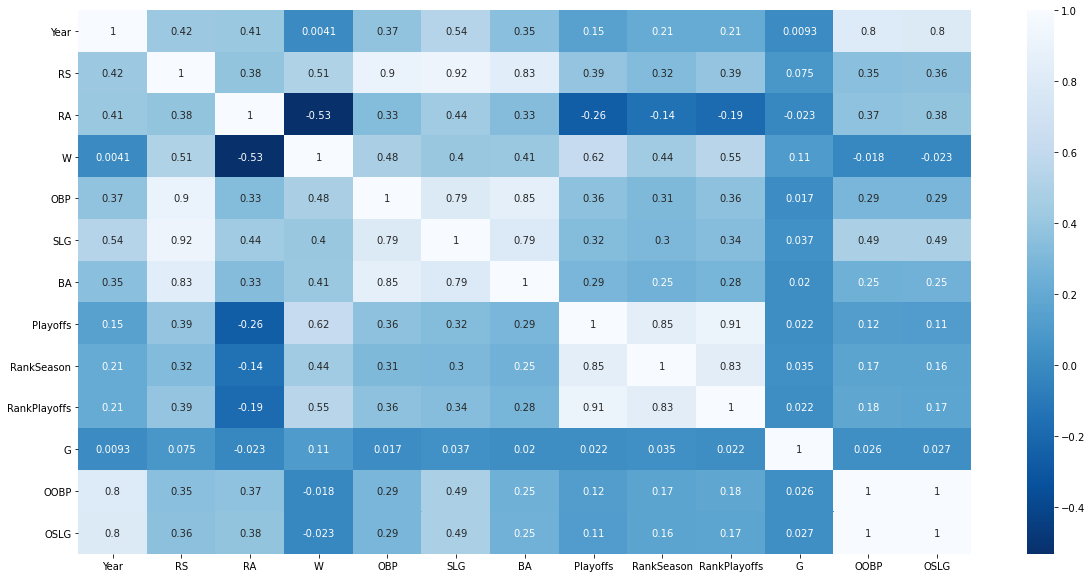

In [7]:
plt.figure(figsize=(20, 10))
sns.heatmap(df_raw.corr(), annot=True, cmap='Blues_r')

In [8]:
columns_to_scale = ['RS', 'RA', 'W', 'OBP', 'SLG', 'BA',
       'Playoffs', 'RankSeason', 'RankPlayoffs']
df_raw = df_raw[columns_to_scale]

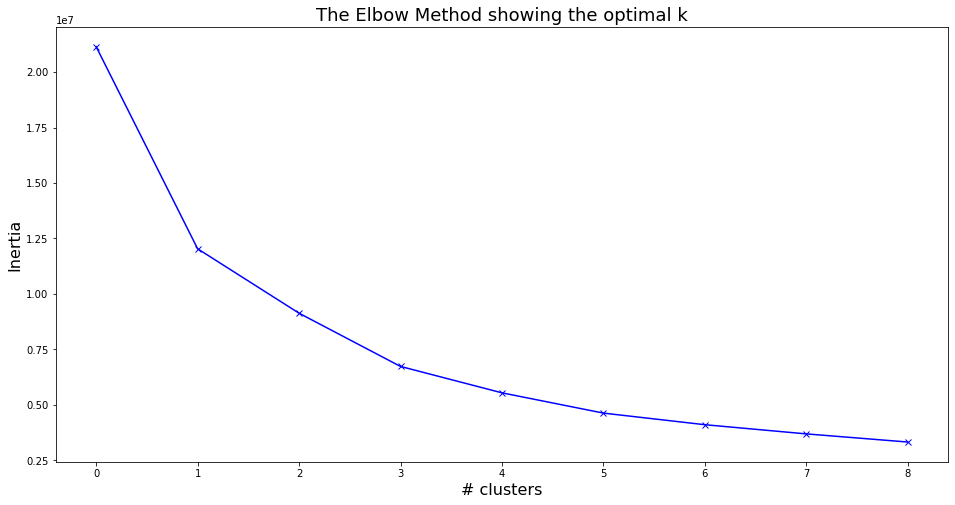

In [9]:
elbow_method(df_raw)

In [10]:
df_kmeans = model_kmeans(df_raw, 3)
df_kmeans.head()

,RS,RA,W,OBP,SLG,BA,Playoffs,RankSeason,RankPlayoffs,target
0,734,688,81,0.328,0.418,0.259,0,0.0,0.0,1
1,700,600,94,0.320,0.389,0.247,1,4.0,5.0,2
2,712,705,93,0.311,0.417,0.247,1,5.0,4.0,1
3,734,806,69,0.315,0.415,0.260,0,0.0,0.0,0
4,613,759,61,0.302,0.378,0.240,0,0.0,0.0,2


<AxesSubplot:title={'center':'Compare values of columns RS and SLG'}, xlabel='RS', ylabel='SLG'>

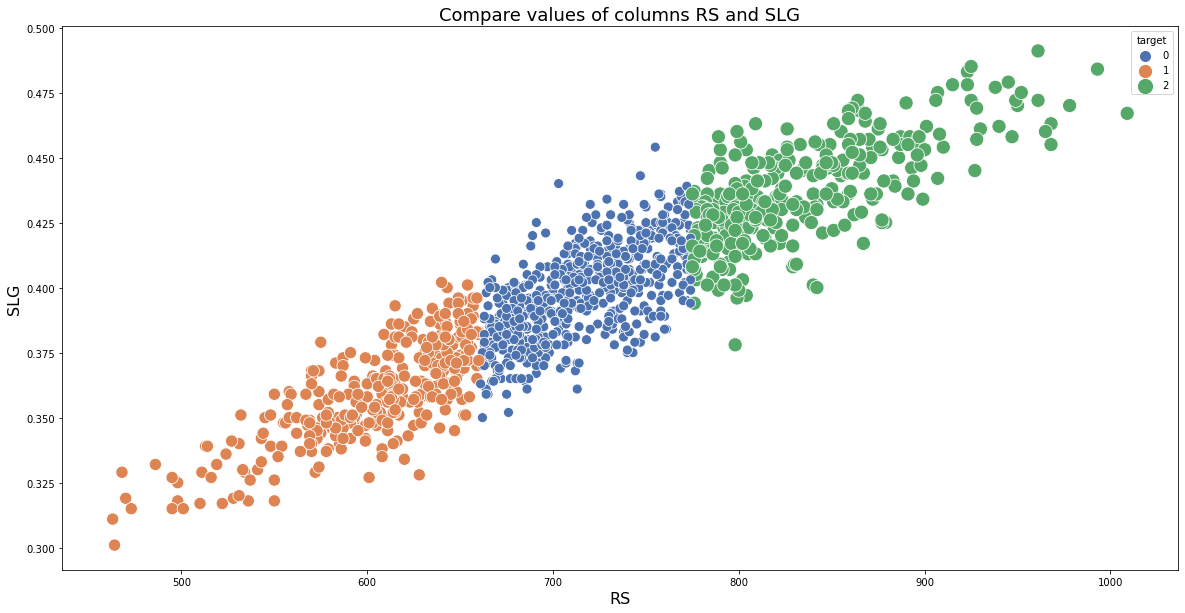

In [11]:
cluster_kmeans(df_raw, 'RS', 'SLG', 3)

## Using Scaling data

In [12]:
scaler = MinMaxScaler()
columns_to_scale = ['RS', 'RA', 'W', 'OBP', 'SLG', 'BA',
       'Playoffs', 'RankSeason', 'RankPlayoffs']
df_values = scaler.fit_transform(df_raw[columns_to_scale])
df = pd.DataFrame(df_values, columns=columns_to_scale)
df.head()

,RS,RA,W,OBP,SLG,BA,Playoffs,RankSeason,RankPlayoffs
0,0.496337,0.342314,0.539474,0.531250,0.615789,0.5625,0.0,0.000,0.0
1,0.434066,0.202853,0.710526,0.447917,0.463158,0.4125,1.0,0.500,1.0
2,0.456044,0.369255,0.697368,0.354167,0.610526,0.4125,1.0,0.625,0.8
3,0.496337,0.529319,0.381579,0.395833,0.600000,0.5750,0.0,0.000,0.0
4,0.274725,0.454834,0.276316,0.260417,0.405263,0.3250,0.0,0.000,0.0


<AxesSubplot:>

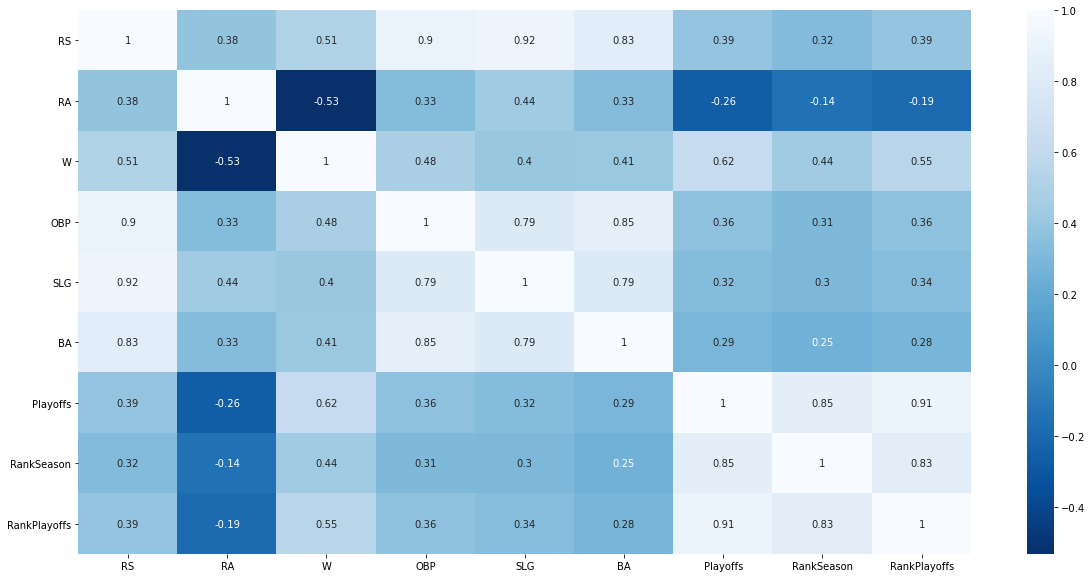

In [13]:
plt.figure(figsize=(20, 10))
sns.heatmap(df.corr(), annot=True, cmap='Blues_r')

# Agrupamento

## Find the optimal number of clusters with Elbow Method

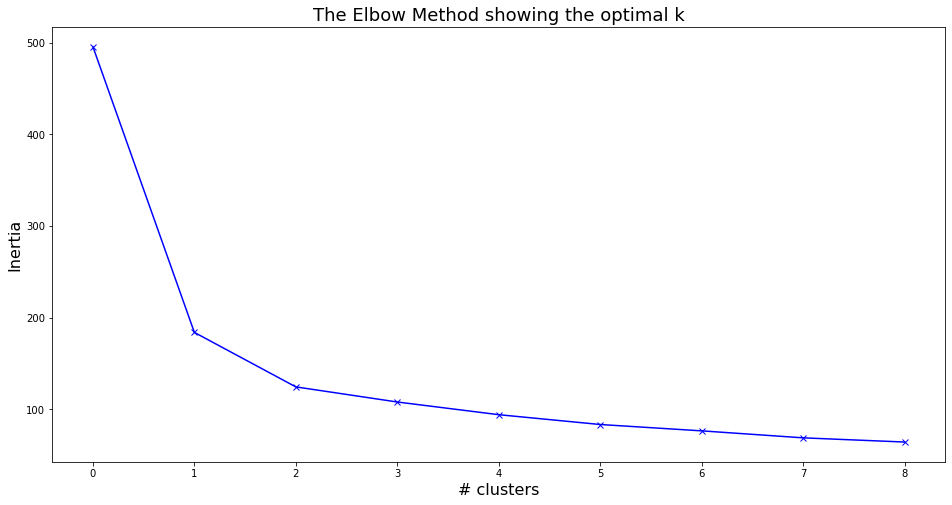

In [15]:
elbow_method(df)

In [16]:
df_kmeans = model_kmeans(df, 2)
df_kmeans.head()

,RS,RA,W,OBP,SLG,BA,Playoffs,RankSeason,RankPlayoffs,target
0,0.496337,0.342314,0.539474,0.531250,0.615789,0.5625,0.0,0.000,0.0,0
1,0.434066,0.202853,0.710526,0.447917,0.463158,0.4125,1.0,0.500,1.0,1
2,0.456044,0.369255,0.697368,0.354167,0.610526,0.4125,1.0,0.625,0.8,1
3,0.496337,0.529319,0.381579,0.395833,0.600000,0.5750,0.0,0.000,0.0,0
4,0.274725,0.454834,0.276316,0.260417,0.405263,0.3250,0.0,0.000,0.0,0


<AxesSubplot:title={'center':'Compare values of columns RS and SLG'}, xlabel='RS', ylabel='SLG'>

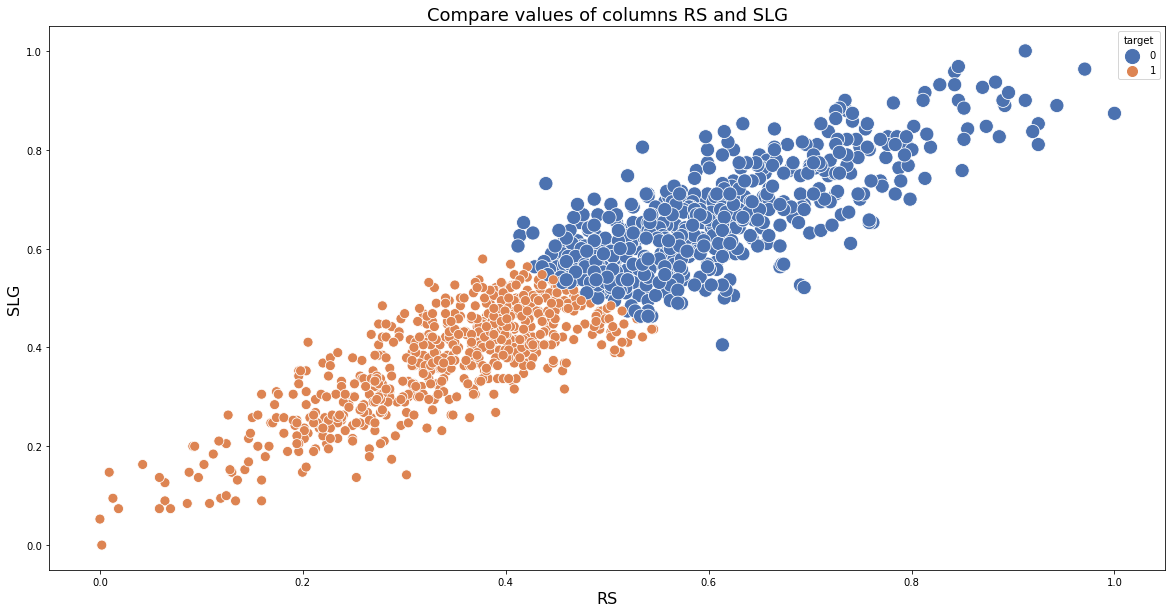

In [17]:
cluster_kmeans(df, 'RS', 'SLG', 2)